# Table of Contents

- [1. Quantum Jump Method](#1-quantum-jump-method)
- [2. Two Level Atom](#2-two-level-atom)
- [3. Interacting Atoms](#3-interacting-atoms)
- [4. Codes](#4-codes)

## Summary

This notebook demonstrates the implementation and analysis of open quantum systems using the Quantum Jump Method. It covers both two-level and interacting atom cases, with numerical and analytical comparison.

- [1. Quantum Jump Method](#1-quantum-jump-method)
- [2. Two Level Atom](#2-two-level-atom)
  - [Figure 0](#Figure0): Excitation density for two quantum trajectories
  - [Figure 1](#Figure1): $n_{e}(t)$ - numerical result
  - [Figure 2](#Figure2): $n_{e}(t)$ - exact result
  - [Figure 3](#Figure3): $n_{e}(t)$ - numerics vs. exact
- [3. Interacting Atoms](#3-interacting-atoms)
  - Initial state $\ket{\psi(0)}=\ket{g}\otimes\ket{g}$
    - [Figure 4-1](#Figure4-1): $n_{e,1}(t)$, $n_{e,2}(t)$ - numerical result
    - [Figure 4-2](#Figure4-2): $n_{e,1}(t)$, $n_{e,2}(t)$ - exact result
    - [Figure 4-3](#Figure4-3): $n_{e,1}(t)$, $n_{e,2}(t)$ - numerics vs. exact
  - Initial state $\ket{\psi(0)}=\ket{g}\otimes\ket{e}$
    - [Figure 4-4](#Figure4-4): $n_{e,1}(t)$, $n_{e,2}(t)$ - numerical result
    - [Figure 4-5](#Figure4-5): $n_{e,1}(t)$, $n_{e,2}(t)$ - exact result
    - [Figure 4-6](#Figure4-6): $n_{e,1}(t)$ - numerics vs. exact
    - [Figure 4-7](#Figure4-7): $n_{e,2}(t)$ - numerics vs. exact
  - Initial state $\ket{\psi(0)}=\frac{1}{2}[0,1,-1,0]$
    - [Discussion on Dark State](#Discussion)
    - [Figure 4-9](#Figure4-9): Compare the dynamics of two initial states
- [4. Codes](#4-codes)
**Note: The code blocks below have all been refactored and moved into separate Python modules under the `src` folder (operators.py, utils.py, simulation.py, quantum_system.py, etc.).  
> This notebook only retains the import statements and main workflow to ensure a modular and maintainable project structure.  
> For implementation details, please refer to the respective .py files.**

## 1. Quantum Jump method
### Lindblad master equation

$\partial_{t}\rho = -i[H,\rho] +  \gamma(L\rho L^{\dagger}-\frac{1}{2}\{L^{\dagger}L,\rho \})= -i(H_{eff}\rho - \rho H^{\dagger}_{eff})+\gamma L\rho L^{\dagger}$

$H_{eff}= H - \frac{i}{2}\gamma L^{\dagger}L$

### Integrate the Wavefunction

At each time step, stochastically choose

$\ket{\psi(t+\delta t)} \propto e^{-iH_{eff}\delta t}\ket{\psi(t)} = (I - i H_{eff}\delta t - \frac{1}{2}H_{eff}(\delta t)^{2}+ ...)\ket{\psi(t)}$

$\ket{\psi(t+\delta t)} \propto L\psi(t)$


**In our cases** 

*Two-level atom*

$H = \Omega\sigma^x$

$L = \sigma^-$

$L^\dagger = \sigma^+$

*Interacting atoms*

$H = \Omega(\sigma^x_1+\sigma^x_2)$

$L = \frac{1}{\sqrt{2}}\sigma^{-}_{1}+\frac{1}{\sqrt{2}}\sigma^{-}_{2}$

$L^{\dagger} = \frac{1}{\sqrt{2}}\sigma^{+}_{1}+\frac{1}{\sqrt{2}}\sigma^{+}_{2}$



In [1]:
from operators import S_x, S_minus, phi_basis_vecs, rho_basis_ops, id, S_plus
from quantum_system import QuantumSystem
from simulation import N_trajectory_twoLevelSystem, N_trajectory_twoAtomSystem, exact_twoLevelSystem, exact_twoAtomSystem
from utils import dagger, commutator, jump_probability, plot_excitation_density

## 2. Two Level Atom

In [10]:
# Define two-level sysyem
omega = 15
gamma = omega / 3
H = omega * S_x(1,1)
L = S_minus(1,1)
total_time = 1.6
dt = 0.000016

twoLevelSystem = QuantumSystem(H, gamma, L, dt)


### Choose initial state 
$\ket{\psi(0)}= \ket{g}=
\begin{pmatrix}
    1 \\
    0 \\
\end{pmatrix}$

In [11]:
states_twoLevelSystem, ne_twoLevelSystem, ne_avg_twoLevelSystem,  time_values_twoLevelSystem = N_trajectory_twoLevelSystem(3000, phi_basis_vecs(1)[0], total_time, dt, 0.005, twoLevelSystem)


100%|█████████████████████████████████████| 3000/3000 [1:20:38<00:00,  1.61s/it]


Simulation complete


<a id="Figure0"></a>

### Simulation Results

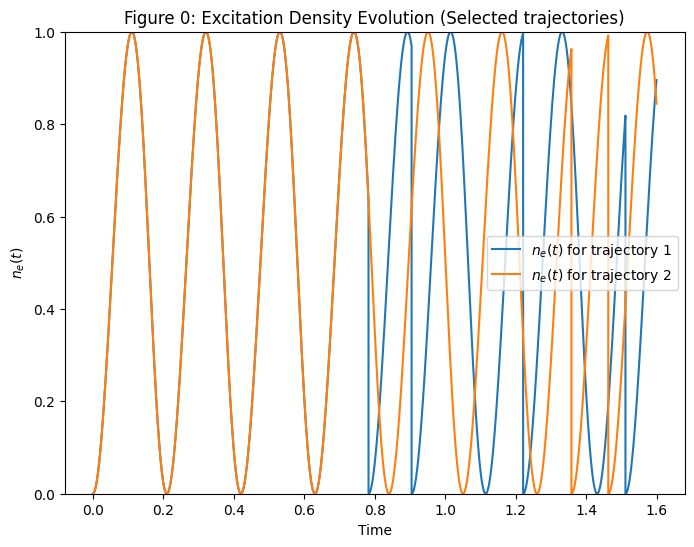

In [14]:
traj_ne_twoLevelSystem = [ne_twoLevelSystem[0],ne_twoLevelSystem[1]]
plot_excitation_density(time_values_twoLevelSystem, traj_ne_twoLevelSystem, 'Figure 0: Excitation Density Evolution (Selected trajectories)', 0)


<a id="Figure0"></a>

<a id="Figure1"></a>

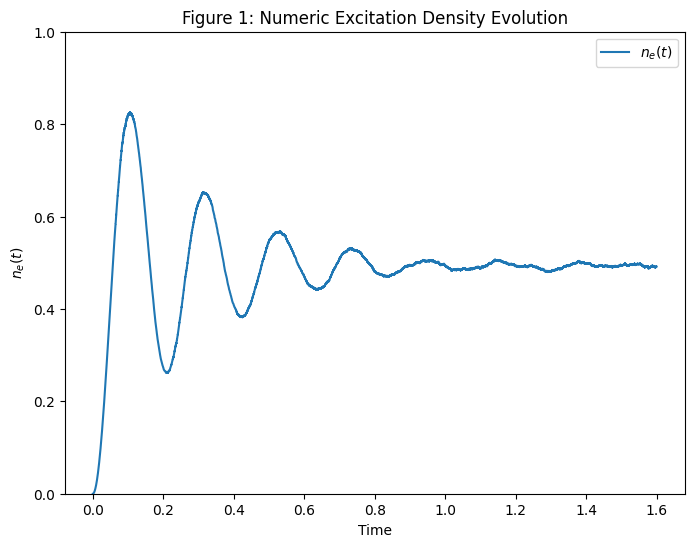

In [16]:
plot_excitation_density(time_values_twoLevelSystem, ne_avg_twoLevelSystem, 'Figure 1: Numeric Excitation Density Evolution', 0)



<a id="Figure0"></a>

### Calculate the analytical result $n_{e}(t)$

In [17]:
ne_exact_twoLevelSystem, ne_infty_twoLevelSystem = exact_twoLevelSystem(15, 5, phi_basis_vecs(1)[0], time_values_twoLevelSystem)



<a id="Figure2"></a>

### Plot the analytical result $n_e(t)$

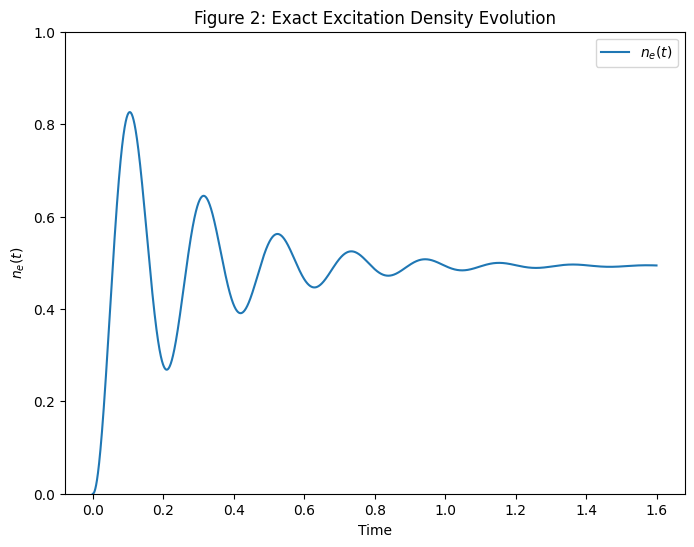

In [18]:
plot_excitation_density(time_values_twoLevelSystem, ne_exact_twoLevelSystem, 'Figure 2: Exact Excitation Density Evolution', 0)



<a id="Figure3"></a>

### Compare the numerical and analytical results $n_{e}(t)$

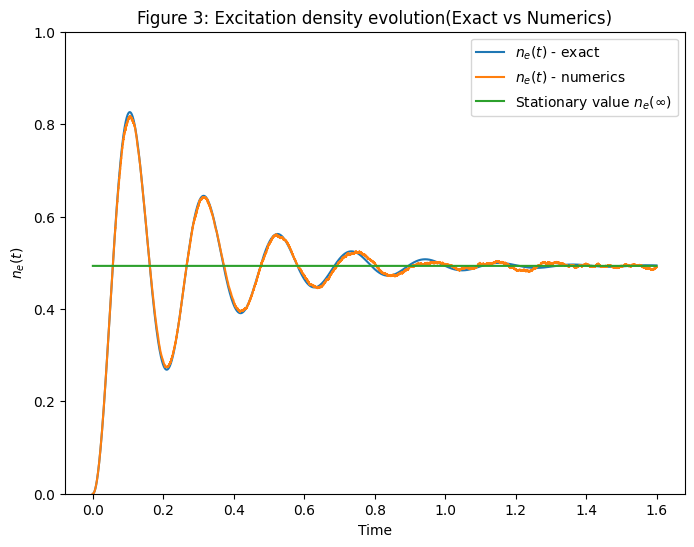

In [48]:
ne_comparison = [ne_exact_twoLevelSystem, ne_avg_twoLevelSystem, ne_infty_twoLevelSystem]
plot_excitation_density(time_values_twoLevelSystem, ne_comparison, 'Figure 3: Excitation density evolution(Exact vs Numerics)', 1)



## 3. Interacting Atoms

In [36]:
# Define interacting atom system
omega = 15
gamma = 2*omega/3
H = omega * (S_x(2,1) + S_x(2,2))
L = (S_minus(2,1) + S_minus(2,2)) / np.sqrt(2)
total_time = 1.6
dt = 0.000016

twoAtomSystem = QuantumSystem(H, gamma, L, dt)

## Choose initial state 
$\ket{\psi(0)}= \ket{gg}=
\begin{pmatrix}
    1 \\
    0 \\
    0 \\
    0 \\
\end{pmatrix}$

In [38]:
states_twoAtomSystem_0, ne_twoAtomSystem_0, ne_avg_twoAtomSystem_0, time_values_twoAtomSystem_0 = N_trajectory_twoAtomSystem(2700, phi_basis_vecs(2)[0], total_time, dt, 0.005, twoAtomSystem)


100%|█████████████████████████████████████| 2700/2700 [1:49:25<00:00,  2.43s/it]


Simulation complete


<a id="Figure4-1"></a>

### Simulation Results

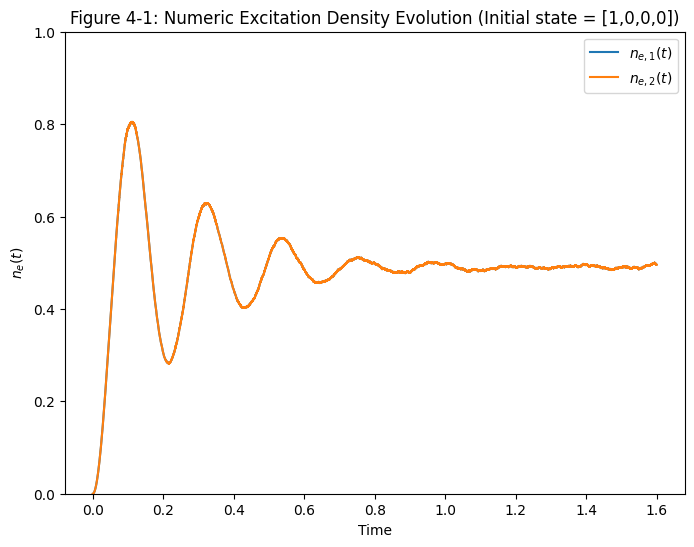

In [76]:
plot_excitation_density(time_values_twoAtomSystem_0, ne_avg_twoAtomSystem_0, 'Figure 4-1: Numeric Excitation Density Evolution (Initial state = [1,0,0,0])', 0)



### Calculate the analytical result $n_{e,k}(t)$

In [42]:
ne_exact_twoAtomSystem_0, ne_infty_twoAtomSystem_0 = exact_twoAtomSystem(omega, gamma, phi_basis_vecs(2)[0], time_values_twoAtomSystem_0)


<a id="Figure4-2"></a>

### Plot the analytical result $n_{e,k}(t)$

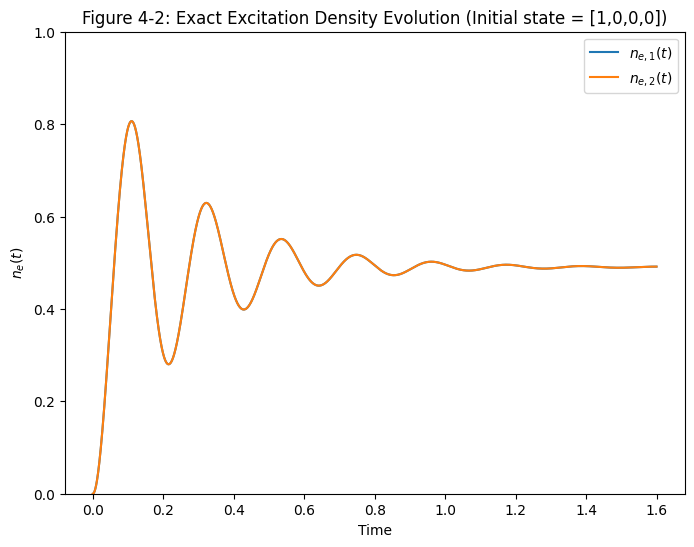

In [77]:
plot_excitation_density(time_values_twoAtomSystem_0, ne_exact_twoAtomSystem_0, 'Figure 4-2: Exact Excitation Density Evolution (Initial state = [1,0,0,0])', 0)



### Compare the numerical and analytical results $n_{e,k}(t)$

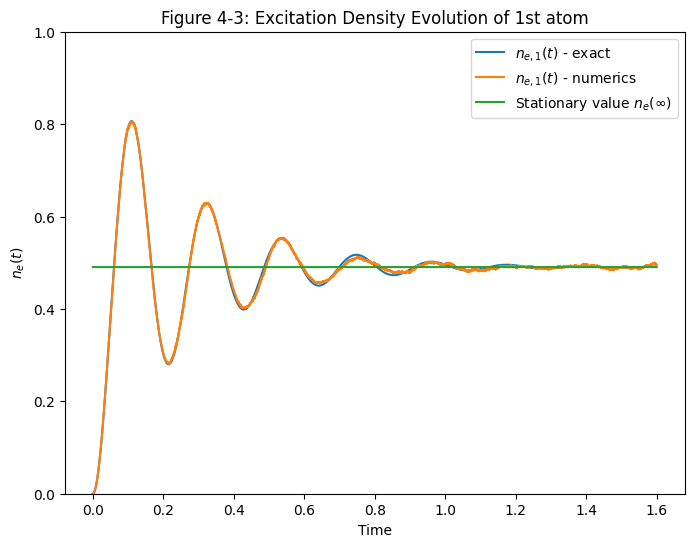

In [71]:
ne1_comparison_0 = [ne_exact_twoAtomSystem_0[0], ne_avg_twoAtomSystem_0[0], ne_infty_twoAtomSystem_0[0]]
ne2_comparison_0 = [ne_exact_twoAtomSystem_0[1], ne_avg_twoAtomSystem_0[1], ne_infty_twoAtomSystem_0[1]]
plot_excitation_density(time_values_twoAtomSystem_0, ne1_comparison_0, 'Figure 4-3: Excitation Density Evolution of 1st atom', 1)


<a id="Figure4-3"></a>

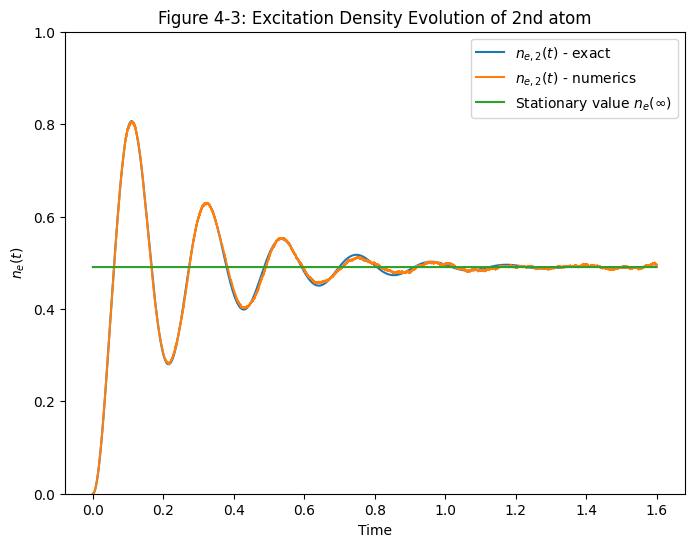

In [68]:
plot_excitation_density(time_values_twoAtomSystem_0, ne2_comparison_0, 'Figure 4-3: Excitation Density Evolution of 2nd atom', 1)

### Choose initial state 
$\ket{\psi(0)}= \ket{ge} = 
\begin{pmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
\end{pmatrix}$

In [52]:
states_twoAtomSystem_1, ne_twoAtomSystem_1, ne_avg_twoAtomSystem_1, time_values_twoAtomSystem_1 = N_trajectory_twoAtomSystem(2700, phi_basis_vecs(2)[1], total_time, dt, 0.005, twoAtomSystem)


100%|█████████████████████████████████████| 2700/2700 [1:47:20<00:00,  2.39s/it]


Simulation complete


<a id="Figure4-4"></a>

### Simulation Results

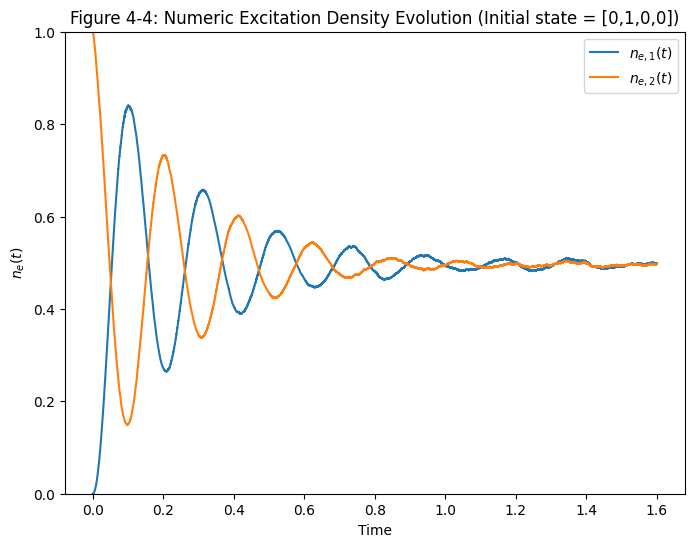

In [78]:
plot_excitation_density(time_values_twoAtomSystem_1, ne_avg_twoAtomSystem_1, 'Figure 4-4: Numeric Excitation Density Evolution (Initial state = [0,1,0,0])', 0)



<a id="Figure4"></a>

### Calculate the analytical result $n_{e,k}(t)$

In [54]:
ne_exact_twoAtomSystem_1, ne_infty_twoAtomSystem_1 = exact_twoAtomSystem(omega, gamma, phi_basis_vecs(2)[1], time_values_twoAtomSystem_1)



<a id="Figure4-5"></a>

### Plot the analytical result $n_{e,k}(t)$

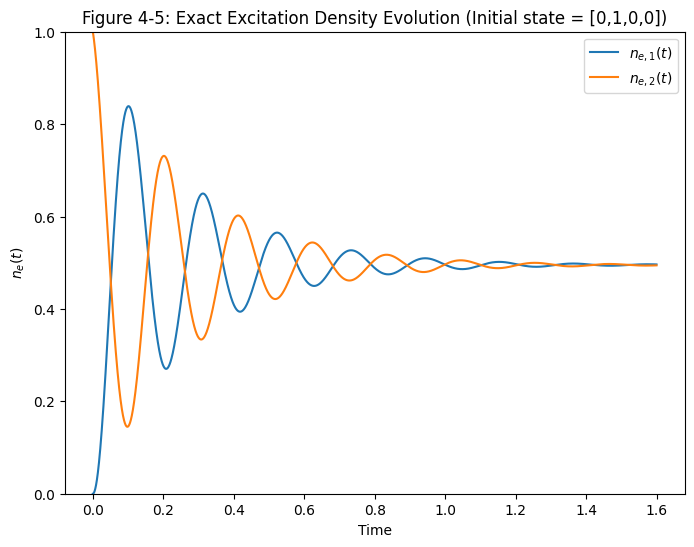

In [79]:
plot_excitation_density(time_values_twoAtomSystem_1, ne_exact_twoAtomSystem_1, 'Figure 4-5: Exact Excitation Density Evolution (Initial state = [0,1,0,0])', 0)



<a id="Figure4-6"></a>

### Compare the numerical and analytical results $n_{e,k}(t)$

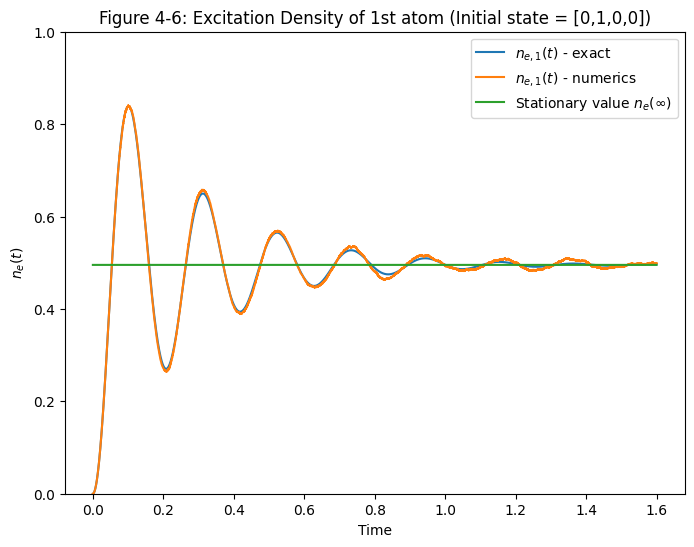

In [58]:
ne1_comparison_1 = [ne_exact_twoAtomSystem_1[0], ne_avg_twoAtomSystem_1[0], ne_infty_twoAtomSystem_1[0]]
ne2_comparison_1 = [ne_exact_twoAtomSystem_1[1], ne_avg_twoAtomSystem_1[1], ne_infty_twoAtomSystem_1[1]]
plot_excitation_density(time_values_twoAtomSystem_1, ne1_comparison_1, 'Figure 4-6: Excitation Density of 1st atom (Initial state = [0,1,0,0])', 1)


<a id="Figure4-7"></a>

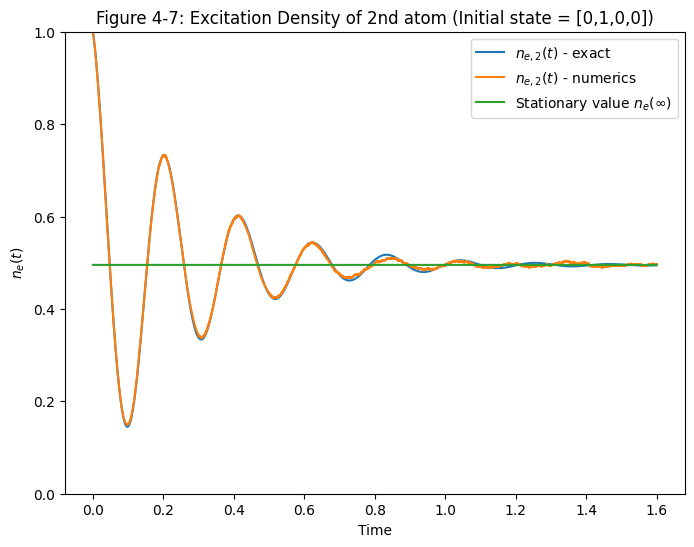

In [60]:
plot_excitation_density(time_values_twoAtomSystem_1, ne2_comparison_1, 'Figure 4-7: Excitation Density of 2nd atom (Initial state = [0,1,0,0])', 1)



### Choose initial state (Dark state)
$\ket{\psi(0)} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
    0 \\
    1 \\
    -1 \\
    0 \\
\end{pmatrix}$ 

### Discussion: 
it can be easily checked that the propagation operator keeps the dark state unchanged

In [13]:
# propagation on the dark state
dark_state = np.array([[0],[np.sqrt(1/2)],[-np.sqrt(1/2)],[0]], dtype = complex)
print(twoAtomSystem.U_eff @ dark_state == dark_state)
    

[[ True]
 [ True]
 [ True]
 [ True]]


and the jump operator destroy the dark state

In [14]:
print(twoAtomSystem.L @ dark_state)

[[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]


<a id="Discussion"></a>

Thus, if the chosen initial state is dark state, it will remain the same state as time evolves.
On the other hand, for general initial states, their dark component will be destroyed as time evolves due to jumps.

Compare the dynamics given initial state $\ket{\psi_{1}(0)} =
\begin{pmatrix}
    \frac{1}{2} \\
    \frac{1}{2} \\
    -\frac{1}{2} \\
    \frac{1}{2} \\
\end{pmatrix}$
vs initial state $\ket{\psi_{2}(0)} =
\begin{pmatrix}
    \sqrt{\frac{1}{2}} \\
    0 \\
    0 \\
    \sqrt{\frac{1}{2}} \\
\end{pmatrix}$

In [12]:
init_state = np.array([[1/2], [1/2], [-1/2], [1/2]], dtype=complex) 
states_twoAtomSystem_2, ne_twoAtomSystem_2, ne_avg_twoAtomSystem_2, time_values_twoAtomSystem_2 = N_trajectory_twoAtomSystem(3000, init_state, total_time, dt, 0.005, twoAtomSystem)



100%|█████████████████████████████████████| 3000/3000 [1:57:57<00:00,  2.36s/it]


Simulation complete


In [14]:
init_state_3 = np.array([[np.sqrt(1/2)], [0], [0], [np.sqrt(1/2)]], dtype=complex) 
states_twoAtomSystem_3, ne_twoAtomSystem_3, ne_avg_twoAtomSystem_3, time_values_twoAtomSystem_3 = N_trajectory_twoAtomSystem(3000, init_state, total_time, dt, 0.005, twoAtomSystem)



100%|█████████████████████████████████████| 3000/3000 [2:14:56<00:00,  2.70s/it]


Simulation complete


<a id="Figure4-9"></a>

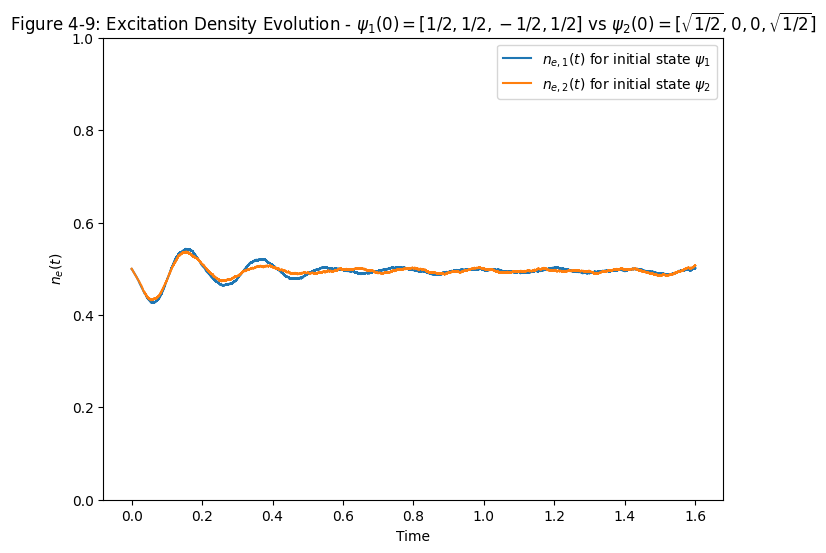

In [64]:
comparison_3 = [ne_avg_twoAtomSystem_2[1],ne_avg_twoAtomSystem_3[0]]

plot_excitation_density(time_values_twoAtomSystem_3, comparison_3, r'Figure 4-9: Excitation Density Evolution - $\psi_{1}(0)=[1/2,1/2,-1/2,1/2]$ vs $\psi_{2}(0)=[\sqrt{1/2},0,0,\sqrt{1/2}]$', 0)




## 4. Codes

In [24]:
# 優化測試 block



In [ ]:
# For N = 1 , {|g), |e)}
# For N = 2 , {|g)|g), |g)|e), |e)|g), |e)|e)}
def phi_basis_vecs(N):
    """
    Generate computational basis vectors for N qubits.

    Args:
        N (int): Number of qubits.

    Returns:
        list of np.ndarray: Basis vectors.
    """
    dim = 2**N
    return [np.eye(dim, dtype=complex)[:, [i]] for i in range(dim)]

# For N = 1 , {GG=|g)(g|, GE=|g)(e|, EG=|e)(g|, EE=|e)(e|}
# For N = 2 , {GGGG,GGGE,GGEG,GGEE,GEGG,GEGE,GEEG,GEEE,EGGG,EGGE,EGEG,EGEE,EEGG,EEGE,EEEG,EEEE}
def rho_basis_ops(N):
    """
    Generate computational basis operators for N qubits.

    Args:
        N (int): Number of qubits.

    Returns:
        list of np.ndarray: Basis operators |i><j|.
    """
    dim = 2**N
    return [np.eye(dim, dtype=complex)[[i], :] @ np.eye(dim, dtype=complex)[:, [j]].T for i in range(dim) for j in range(dim)]

def id(N):
    """
    Return the identity matrix for N qubits.

    Args:
        N (int): Number of qubits.

    Returns:
        np.ndarray: Identity matrix of size 2^N x 2^N.
    """
    dim = 2**N
    return np.eye(dim, dtype=complex)

def S_x(N, n):
    """
    Construct the Pauli X operator for the n-th atom in an N-atom system.

    Args:
        N (int): Number of atoms.
        n (int): Index of the atom (1-based).

    Returns:
        np.ndarray: The operator matrix.
    """
    s_x = np.array([[0, 1], [1, 0]], dtype=complex)
    identity = np.eye(2, dtype=complex)
    ops = [s_x if i == n-1 else identity for i in range(N)]
    return reduce(np.kron, ops)

def S_plus(N, n):
    """
    Construct the Pauli raising operator (σ⁺) for the n-th atom in an N-atom system.

    Args:
        N (int): Number of atoms.
        n (int): Index of the atom (1-based).

    Returns:
        np.ndarray: The operator matrix.
    """
    s_plus = np.array([[0, 0], [1, 0]], dtype=complex)
    identity = np.eye(2, dtype=complex)
    ops = [s_plus if i == n-1 else identity for i in range(N)]
    return reduce(np.kron, ops)

def S_minus(N, n):
    """
    Construct the Pauli lowering operator (σ⁻) for the n-th atom in an N-atom system.

    Args:
        N (int): Number of atoms.
        n (int): Index of the atom (1-based).

    Returns:
        np.ndarray: The operator matrix.
    """
    s_minus = np.array([[0, 1], [0, 0]], dtype=complex)
    identity = np.eye(2, dtype=complex)
    ops = [s_minus if i == n-1 else identity for i in range(N)]
    return reduce(np.kron, ops)

In [ ]:
def dagger(matrix):
    """
    Return the Hermitian conjugate (dagger) of a matrix.

    Args:
        matrix (np.ndarray): Input matrix.

    Returns:
        np.ndarray: Hermitian conjugate of the input.
    """
    return np.transpose(np.conj(matrix))

def commutator(matrix_1, matrix_2, sign):
    """
    Compute the commutator or anti-commutator of two matrices.

    Args:
        matrix_1 (np.ndarray): First matrix.
        matrix_2 (np.ndarray): Second matrix.
        sign (int): 0 for commutator [A,B], 1 for anti-commutator {A,B}.

    Returns:
        np.ndarray: Result of the operation.
    """
    if sign == 0:
        return matrix_1 @ matrix_2 - matrix_2 @ matrix_1
    else:
        return matrix_1 @ matrix_2 + matrix_2 @ matrix_1

def jump_probability(state):
    """
    Calculate the probability of a quantum jump for a given state.

    Args:
        state (np.ndarray): State vector.

    Returns:
        float: Probability of jump (non-negative).
    """
    dp = max(0, 1 - np.linalg.norm(state))
    return dp

In [12]:
def plot_excitation_density(time, n_e, title_text, compare):
    plt.figure(figsize=(8,6))
    
    if len(n_e) > 100:
        plt.plot(time, n_e, label=r'$n_{e}(t)$')
    elif compare == 1:        
        plt.plot(time, n_e[0], label=r'$n_{e,1}(t)$ - exact')
        plt.plot(time, n_e[1], label=r'$n_{e,1}(t)$ - numerics')
        plt.plot(time, n_e[2], label=r'Stationary value $n_{e}(\infty)$')
    else:
        plt.plot(time, n_e[0], label=r'$n_{e}(t)$ for trajectory 1')
        plt.plot(time, n_e[1], label=r'$n_{e}(t)$ for trajectory 2')

    plt.ylim(0, 1)
    plt.title(title_text)
    plt.xlabel('Time')
    plt.ylabel(r'$n_{e}(t)$')
    plt.legend()
    plt.show()

In [5]:
class QuantumSystem:
    def __init__(self, H, gamma, L, dt):
        self.H = H                                     # Hamiltonian
        self.gamma = gamma                             # Decay rate
        self.L = L                                     # Jump operator
        self.H_eff = H - 1j/2 * gamma * dagger(L) @ L  # Effective Hamiltonian
        self.U_eff = expm(-1j * self.H_eff * dt)       # Propagator

In [6]:
def N_trajectory_twoLevelSystem(N, init_state, total_time, dt, jump_dt, QuantumSystem):
    
    t_length = int(total_time/dt)    
    L = QuantumSystem.L
    U_eff = QuantumSystem.U_eff

    N_ne_values = []
    N_state_vectors = []
    for n in tqdm(range(N)):
        
        # start a new trajectory simulation        
        time_values = []
        state_vectors = []
        ne_values = []
    
        current_state = init_state
        current_time = 0
        while current_time < total_time:
                  
            # propagation
            current_state_1 = U_eff @ current_state                      # get the candidate propagated state
    
            dp = jump_probability(current_state_1)
            r = np.random.rand()
            if r < dp:                                                   # jump occurs
                time_values.append(current_time)
                current_state = np.sqrt(gamma) * (L @ current_state)     # progapage by acting jump
                current_state = current_state / np.sqrt(dp/dt)           # normalize the state
                state_vectors.append(current_state)
                ne = np.abs(current_state[1][0])**2
                ne_values.append(ne)   
                current_time += jump_dt * dt                             # update time with smaller dt
                           
            else:
                time_values.append(current_time)
                current_state = current_state_1/ np.sqrt(1-dp)           # choose the candidate propagated state
                state_vectors.append(current_state)
                ne = np.abs(current_state[1][0])**2
                ne_values.append(ne)
                current_time += dt                                       # update time with regular dt
                     
        N_state_vectors.append(np.array(state_vectors))
        N_ne_values.append(np.array(ne_values))
    
    print("Simulation complete")

    time_values = time_values[:t_length]
    for n in range(N):
        N_ne_values[n]=N_ne_values[n][:t_length]

   
    N_ne_sum = np.array([0+0j]*t_length, dtype=complex)
    for n in range(N):
        N_ne_sum += N_ne_values[n]
    
    N_ne_avg = N_ne_sum / N
    
    
    return N_state_vectors, N_ne_values, N_ne_avg, time_values

In [7]:
def N_trajectory_twoAtomSystem(N, init_state, total_time, dt, jump_dt, QuantumSystem):
    
    t_length = int(total_time/dt) 
    L = QuantumSystem.L
    U_eff = QuantumSystem.U_eff

    N_ne_values = [[],[]]
    N_ne_avg = [[],[]]
    N_state_vectors = []
    for n in tqdm(range(N)):
        
        # start a new trajectory simulation        
        time_values = []
        state_vectors = []
        ne_values = [[],[]]
    
        current_state = init_state
        current_time = 0
        while current_time < total_time:
                  
            # propagation
            current_state_1 = U_eff @ current_state                      # get the candidate propagated state
    
            dp = jump_probability(current_state_1)
            r = np.random.rand()
            if r < dp:                                                   # jump occurs
                time_values.append(current_time)
                current_state = np.sqrt(gamma) * (L @ current_state)     # progapage by acting jump
                current_state = current_state / np.sqrt(dp/dt)           # normalize the state
                state_vectors.append(current_state)       
                ne1 = np.abs(current_state[2][0])**2 + np.abs(current_state[3][0])**2
                ne_values[0].append(ne1) 
                ne2 = np.abs(current_state[1][0])**2 + np.abs(current_state[3][0])**2
                ne_values[1].append(ne2)
                current_time += jump_dt * dt                             # update time with smaller dt
                           
            else:
                time_values.append(current_time)
                current_state = current_state_1/ np.sqrt(1-dp)           # choose the candidate propagated state
                state_vectors.append(current_state)
                ne1 = np.abs(current_state[2][0])**2 + np.abs(current_state[3][0])**2
                ne_values[0].append(ne1) 
                ne2 = np.abs(current_state[1][0])**2 + np.abs(current_state[3][0])**2
                ne_values[1].append(ne2)
                current_time += dt                                       # update time with regular dt
                     
        N_state_vectors.append(np.array(state_vectors))
        N_ne_values[0].append(np.array(ne_values[0]))
        N_ne_values[1].append(np.array(ne_values[1]))
    
    print("Simulation complete")
    
    time_values = time_values[:t_length]
    for n in range(N):
        N_ne_values[0][n] = N_ne_values[0][n][:t_length]
        N_ne_values[1][n] = N_ne_values[1][n][:t_length]

    N_ne1_sum = np.array([0+0j]*len(N_ne_values[0][0]), dtype=complex)
    N_ne2_sum = np.array([0+0j]*len(N_ne_values[0][0]), dtype=complex)
    for n in range(N):
        N_ne1_sum += N_ne_values[0][n]
        N_ne2_sum += N_ne_values[1][n]
    
    
    N_ne_avg[0] = N_ne1_sum / N
    N_ne_avg[1] = N_ne2_sum / N
    
    
    return N_state_vectors, N_ne_values, N_ne_avg, time_values

In [8]:
def exact_twoLevelSystem(omega, gamma, init_state, time_values):
    ne_infty = 1/ (2+gamma**2/(4*omega**2))
    u0 = np.outer(init_state, init_state).reshape(4)
    # Define the eigenvectors we've solved
    u1 = np.array([1+gamma**2/(4*omega**2), 1j*gamma/(2*omega), -1j*gamma/(2*omega), 1], dtype=complex)
    u2 = np.array([0, 1, 1, 0], dtype=complex)
    u3 = np.array([-1, 1j*8*omega/(gamma+np.sqrt(gamma**2-64*omega**2,dtype=complex)), -1j*8*omega/(gamma+np.sqrt(gamma**2-64*omega**2,dtype=complex)), 1], dtype=complex)
    u4 = np.array([-1, -1j*8*omega/(-gamma+np.sqrt(gamma**2-64*omega**2,dtype=complex)), 1j*8*omega/(-gamma+np.sqrt(gamma**2-64*omega**2,dtype=complex)), 1], dtype=complex)
    u = [u1, u2, u3, u4]
    
    # Define the eigenvalues we've solved
    l1 = 0
    l2 = -gamma/2
    l3 = 1/4 * (-3*gamma - np.sqrt(gamma**2 - 64*omega**2, dtype=complex))
    l4 = 1/4 * (-3*gamma + np.sqrt(gamma**2 - 64*omega**2, dtype=complex))
    l = [l1, l2, l3, l4]
    
    # Solve c1, c2, c3, c4 by Uc = d
    U = np.zeros((4,4), dtype=complex)
    d = np.zeros((4), dtype=complex)
    for m in range(4):
        d[m] = dagger(u[m]) @ u0
        for n in range(4):
            U[m][n] = dagger(u[m]) @ u[n]
    
    c = np.linalg.solve(U,d)
    
    parameters = [c[0], c[1], c[2], c[3], l1, l2, l3, l4, u1, u2, u3, u4]
    # Construct the solution rho(t) of the master equation
    def Rho(parameters, t):
        state = np.array([0, 0, 0, 0], dtype=complex)
        for i in range(4):
            state += parameters[i] * np.exp(parameters[i+4]*t) * parameters[i+8] 
        return state
    
    
    
    # Construct the excitation density ne(t)
    ne_exact = []
    ne_infty_values = []
    for t in time_values:
        norm = Rho(parameters, t)[0] + Rho(parameters, t)[3]
        ne_exact.append(Rho(parameters, t)[3]/norm)
        ne_infty_values.append(ne_infty)
        
    return ne_exact, ne_infty_values


In [9]:
def exact_twoAtomSystem(omega, gamma, init_state, time_values):
    # Build the matrix representation of the Lindbladian superoperator
    gamma = omega/3
    L = twoAtomSystem.L 
    
    def Lind(rho):
        L1 = commutator(S_x(2,1)+S_x(2,2), rho, 0)
        L2 = L @ rho @ dagger(L) - 1/2 * commutator(dagger(L) @ L, rho, 1)
        return -1j * omega * L1 + 2 * gamma * L2

    M2 = np.zeros((16,16),dtype=complex)
    for m in range(16):
        for n in range(16):
            M2[m][n] = np.trace( dagger(rho_basis_ops(2)[m]) @ Lind(rho_basis_ops(2)[n]))
            
    # Calculate eigenvalues and eigenvectors by sympy module
    M2 = Matrix(M2)
    eigenvalues = M2.eigenvals()
    eigenvectors = M2.eigenvects()

    # Store in numpy list
    vectors = []
    values = []
    for i in range(16):
        value = np.squeeze(np.array(eigenvectors[i][0]).astype(complex))
        vector = np.squeeze(np.array(eigenvectors[i][2]).astype(complex))
        values.append(value)
        vectors.append(vector)
    values = np.squeeze(values)
    
    # Set up initial state rho(0)
    phiphi = np.outer(init_state, init_state)
    u0 = phiphi.reshape(16)

    # Solve c1, c2, ..., c16 by Uc = d
    U = np.zeros((16,16), dtype=complex)
    d = np.zeros((16), dtype=complex)
    for m in range(16):
        d[m] = dagger(vectors[m]) @ u0
        for n in range(16):
            U[m][n] = dagger(vectors[m]) @ vectors[n]
    
    c = np.linalg.solve(U,d)

    # Construct the full solution rho(t) and rho_ss
    parameters = []
    parameters.append(c)
    parameters.append(values)
    parameters.append(vectors)
    
    # rho_ss and n_e(infinity)
    rho_stationary = parameters[0][13]*parameters[2][13] + parameters[0][14]*parameters[2][14]
    norm = rho_stationary[0]+rho_stationary[5]+rho_stationary[10]+rho_stationary[15]
    n_e_1_infty = (rho_stationary[10]+rho_stationary[15])/norm
    n_e_2_infty = (rho_stationary[5]+rho_stationary[15])/norm
    
    # rho(t)
    def Rho(parameters, t):
        state = np.zeros((16), dtype=complex)
        for i in range(16):
            state += parameters[0][i] * np.exp(parameters[1][i]*t) * parameters[2][i] 
        return state

    # Construct the excitation density n_e_1(t), n_e_2(t)
    # n_e_1 = tr(|1)(1|_1 . rho) = tr(E3E3.rho) + tr(E4E4.rho) = rho[10] + rho[15]
    # n_e_2 = tr(|1)(1|_2 . rho) = tr(E2E2.rho) + tr(E4E4.rho) = rho[5] + rho[15]
    ne_exact = [[],[]]
    ne_infty_values = [[],[]]
    
    
    for t in time_values:
        ne_exact[0].append( (Rho(parameters, t)[10] + Rho(parameters, t)[15]) )
        ne_exact[1].append( (Rho(parameters, t)[5] + Rho(parameters, t)[15]) )
        ne_infty_values[0].append(n_e_1_infty)
        ne_infty_values[1].append(n_e_2_infty)


    return ne_exact, ne_infty_values